# Case study on Pre-processing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1.Load the dataset into python environment

In [5]:
data = pd.read_csv("titanic_dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Make ‘PassengerId’ as the index column

In [6]:
data.set_index("PassengerId", inplace = True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Check the basic details of the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

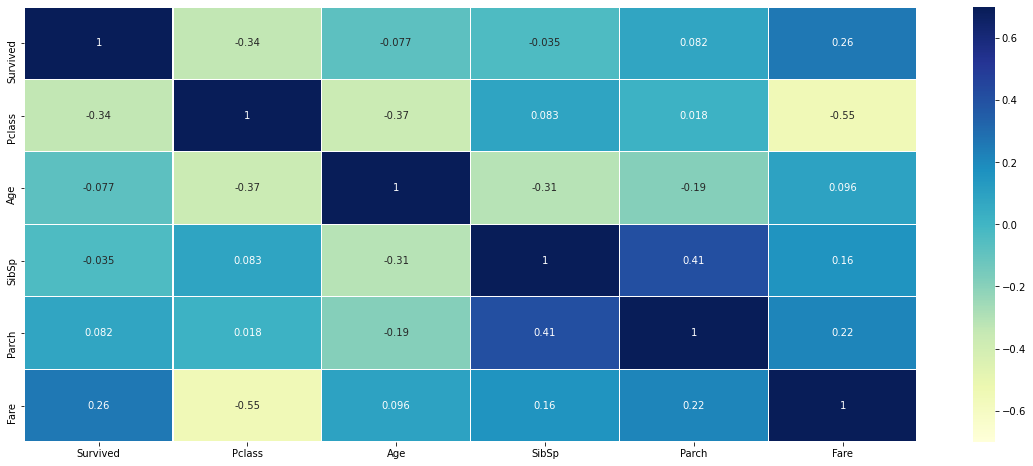

In [11]:
corr=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corr,vmin=-0.7,vmax=0.7,annot=True,linewidths=0.2,cmap='YlGnBu')

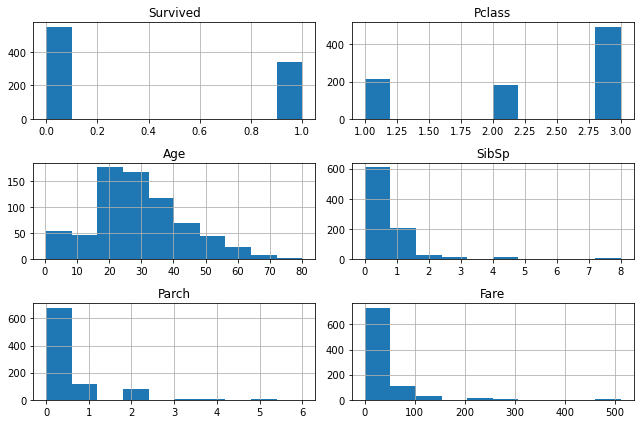

In [13]:
## freq distribution graph
freqgraph=data.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()

4. Fill in all the missing values present in all the columns in the dataset

In [14]:
data['Cabin'] = data['Cabin'].fillna('U')

In [15]:
#passengers belonging to class1
p1 = data[data['Pclass']==1]
#mean age for p1 class passengers 
age1 = p1['Age'].mean()
#passengers belonging to class2
p2 = data[data['Pclass']==2]
#mean age for p2 class passengers 
age2 = p2['Age'].mean()
#passengers belonging to class3
p3 = data[data['Pclass']==3]
#mean age for p3 class passengers 
age3 = p3['Age'].mean()

In [16]:
def age_imputer(dframe):
    age = dframe[0]
    pclass = dframe[1]
    if pd.isnull(age):
        if pclass ==1:
            return age1
        elif pclass ==2:
            return age2
        else:
            return age3
    else:
        return age

In [17]:
data['Age'] = data[['Age','Pclass']].apply(age_imputer,axis=1)

In [ ]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

In [18]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

Age

In [21]:
df1=data

C:\Users\Nisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

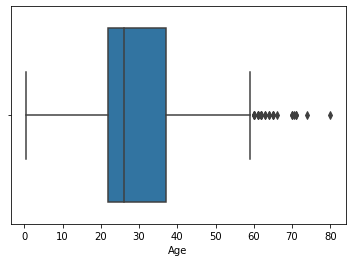

In [22]:
sns.boxplot(df1['Age'],data=df1)

The black points show the presence of extreme values in the variable.

<AxesSubplot:>

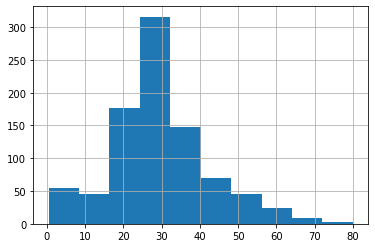

In [34]:
df1['Age'].hist()

In [35]:
print('skewness value of Age: ',df1['Age'].skew())

skewness value of Age:  0.509544674370829


In [36]:
#interquartile range value of the ‘Age’ variable.
Q1=df1['Age'].quantile(0.25)
Q2=df1['Age'].quantile(0.75)
IQR=Q2-Q1
IQR

15.0

In [37]:
whisker_width = 1.5
Age_outliers = df1[(df1['Age'] < Q1 - whisker_width*IQR) | (df1['Age'] > Q2 + whisker_width*IQR)]
Age_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,U,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,U,Q
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S


In [38]:
#prints the outliers
Age_mean = df1['Age'].mean()
Age_std = df1['Age'].std()
low= Age_mean -(3 * Age_std)
high= Age_mean + (3 * Age_std)
Age_outliers = df1[(df1['Age'] < low) | (df1['Age'] > high)]
Age_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,U,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,U,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,U,S


In [39]:
#Flooring And Capping
Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df1['Age']=np.where(df1['Age']>upper_whisker,upper_whisker,np.where(df1['Age']<lower_whisker,lower_whisker,df1['Age']))

C:\Users\Nisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

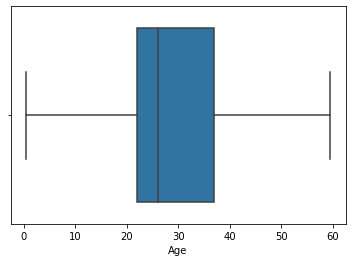

In [40]:
sns.boxplot(df1['Age'],data=data)

Fare

In [24]:
df1=data

C:\Users\Nisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

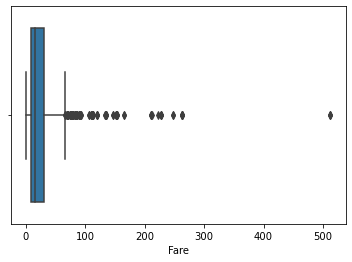

In [25]:
sns.boxplot(df1['Fare'],data=df1)

The black circular points show the presence of extreme values in the variable.

<AxesSubplot:>

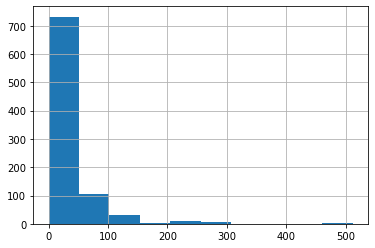

In [27]:
df1['Fare'].hist()

The histogram appears to be distributed to the left, this also indicates the presence of outliers.

In [28]:
print('skewness value of Age: ',df1['Age'].skew())
print('skewness value of Fare: ',df1['Fare'].skew())

skewness value of Age:  0.509544674370829
skewness value of Fare:  4.787316519674893


The ‘Fare’ skewness value of 4.78 shows the variable has been rightly skewed, indicating the presence of outliers.

In [29]:
#interquartile range value of the ‘Fare’ variable.
Q1=df1['Fare'].quantile(0.25)
Q2=df1['Fare'].quantile(0.75)
IQR=Q2-Q1
IQR

23.0896

In [30]:
whisker_width = 1.5
Fare_outliers = df1[(df1['Fare'] < Q1 - whisker_width*IQR) | (df1['Fare'] > Q2 + whisker_width*IQR)]
Fare_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.233441,1,0,PC 17569,146.5208,B78,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,U,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C


In [31]:
#prints the outliers
fare_mean = df1['Fare'].mean()
fare_std = df1['Fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = df1[(df1['Fare'] < low) | (df1['Fare'] > high)]
fare_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,U,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [32]:
#Flooring And Capping
Q1 = df1['Fare'].quantile(0.25)
Q3 = df1['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df1['Fare']=np.where(df1['Fare']>upper_whisker,upper_whisker,np.where(df1['Fare']<lower_whisker,lower_whisker,df1['Fare']))

C:\Users\Nisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

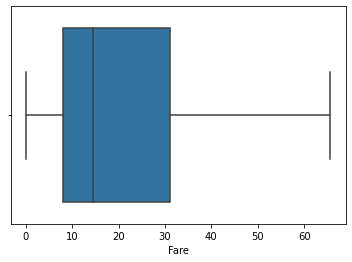

In [33]:
sns.boxplot(df1['Fare'],data=df1)

SibSp

C:\Users\Nisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

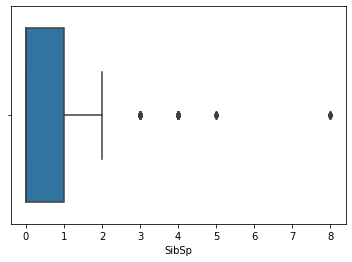

In [41]:
sns.boxplot(df1['SibSp'],data=data)

<AxesSubplot:>

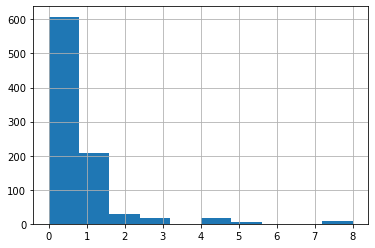

In [42]:
df1['SibSp'].hist()

In [43]:
print('skewness value of SibSp: ',df1['SibSp'].skew())

skewness value of SibSp:  3.6953517271630565


In [44]:
#interquartile range value of the ‘SibSp’ variable.
Q1=df1['SibSp'].quantile(0.25)
Q2=df1['SibSp'].quantile(0.75)
IQR=Q2-Q1
IQR

1.0

In [45]:
whisker_width = 1.5
SibSp_outliers = df1[(df1['SibSp'] < Q1 - whisker_width*IQR) | (df1['SibSp'] > Q2 + whisker_width*IQR)]
SibSp_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,U,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,U,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,65.6344,C23 C25 C27,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,U,S


In [46]:
#prints the outliers
SibSp_mean = df1['SibSp'].mean()
SibSp_std = df1['SibSp'].std()
#A person cannot have number of siblings or spouse below zero. So lower limit is Zero
low= 0
high= SibSp_mean + (3 * SibSp_std)
SibSp_outliers = df1[(df1['SibSp'] < low) | (df1['SibSp'] > high)]
SibSp_outliers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,U,Q
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,U,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,U,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,U,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,U,S


In [47]:
#Flooring And Capping
Q1 = df1['SibSp'].quantile(0.25)
Q3 = df1['SibSp'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df1['SibSp']=np.where(df1['SibSp']>upper_whisker,upper_whisker,np.where(df1['SibSp']<lower_whisker,lower_whisker,df1['SibSp']))

C:\Users\Nisha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

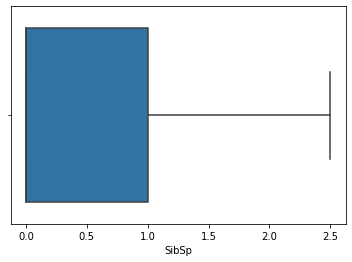

In [48]:
sns.boxplot(df1['SibSp'],data=df1)

In [49]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.129575,0.426487,0.381594,24.046813
std,0.486592,0.836071,12.765815,0.708246,0.806057,20.481625
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,59.500000,2.500000,6.000000,65.634400


In [ ]:
## one hot encoding
df1 = pd.get_dummies(df1, columns=['Sex', 'Embarked'])
df1.head()

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [54]:
df1.drop(['Name','SibSp','Ticket','Cabin'],axis=1,inplace=True)

In [55]:
df1.head()

,Survived,Pclass,Age,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,22.0,0,7.2500,0,1,0,0,1
2,1,1,38.0,0,65.6344,1,0,1,0,0
3,1,3,26.0,0,7.9250,1,0,0,0,1
4,1,1,35.0,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,8.0500,0,1,0,0,1


In [56]:
#importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [57]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [58]:
scaled = scaler.fit_transform(df1)
print(scaled)

[[0.         1.         0.36526743 ... 0.         0.         1.        ]
 [1.         0.         0.63608666 ... 1.         0.         0.        ]
 [1.         1.         0.43297224 ... 0.         0.         1.        ]
 ...
 [0.         1.         0.4184262  ... 0.         0.         1.        ]
 [1.         0.         0.43297224 ... 1.         0.         0.        ]
 [0.         1.         0.53452945 ... 0.         1.         0.        ]]


In [59]:
data_new = pd.DataFrame(scaled)
data_new.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.365267,0.0,0.110460,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.636087,0.0,1.000000,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.432972,0.0,0.120745,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.585308,0.0,0.809027,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.585308,0.0,0.122649,0.0,1.0,0.0,0.0,1.0


In [60]:
data_new.describe()

,0,1,2,3,4,5,6,7,8,9
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.485944,0.063599,0.366375,0.352413,0.647587,0.188552,0.086420,0.722783
std,0.486592,0.418036,0.216077,0.134343,0.312056,0.477990,0.477990,0.391372,0.281141,0.447876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.365267,0.000000,0.120522,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.432972,0.000000,0.220223,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.619160,0.000000,0.472313,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(data_new.drop(0,axis=1), 
                                                    data_new[0], test_size=0.30, 
                                                    random_state=101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred= logmodel.predict(X_test)  
y_pred

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0.

In [66]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_pred,y_test)
cm

array([[133,  40],
       [ 21,  74]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score
print("The prediction accuracy for the model is {}%".format(round(accuracy_score(y_test,y_pred),4)*100))

The prediction accuracy for the model is 77.24%
